# Lab 10 - Data Clustering K-Means

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1

In [9]:
data = pd.read_csv('dataset_10.csv')
df = pd.DataFrame(data)

data.head()

,points,assists,rebounds
0,18,3,15
1,19,4,14
2,14,5,10
3,14,4,8
4,11,7,14


In [10]:
centroids = np.array([
    [18.0, 3.0, 15],  # Centroid 1
    [19.0, 4.0, 14]   # Centroid 2
])

def assign_clusters(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    
    clusters = np.argmin(distances, axis=1)
    return clusters

clusters = assign_clusters(data, centroids)

def update_centroids(data, clusters, num_clusters):
    new_centroids = np.zeros((num_clusters, data.shape[1]))
    
    for i in range(num_clusters):
        if np.any(clusters == i):
            new_centroids[i] = data[clusters == i].mean(axis=0)
        else:
            new_centroids[i] = centroids[i] 
    return new_centroids

new_centroids = update_centroids(data, clusters, centroids.shape[0])

print("Clusters:", clusters)
print("Updated Centroids:\n", new_centroids)

Clusters: [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Updated Centroids:
 [[14.5     5.     14.5   ]
 [47.0625  7.9375  7.875 ]]


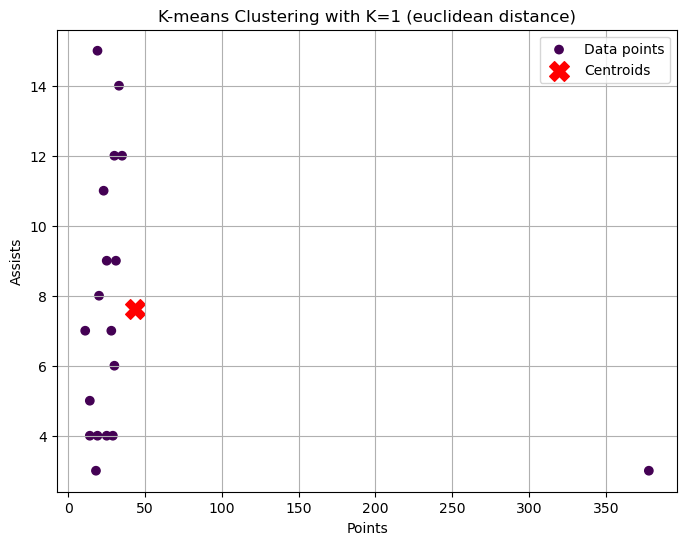

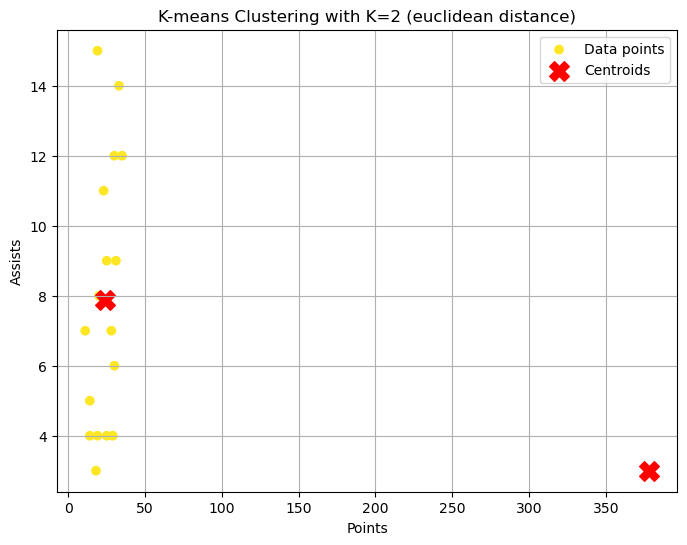

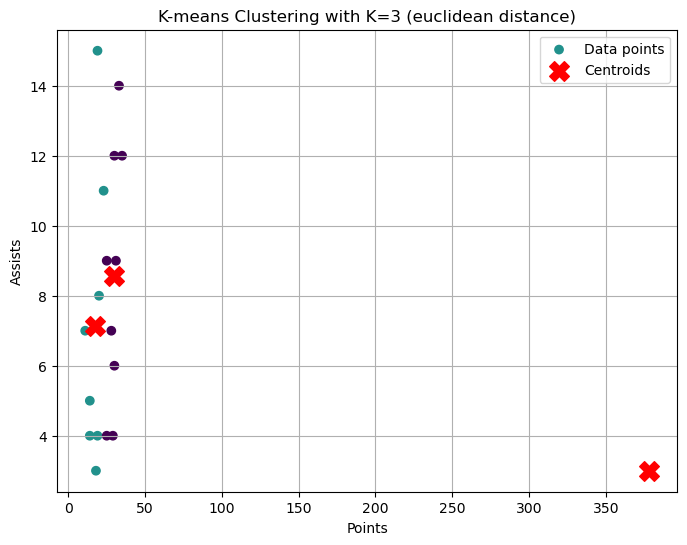

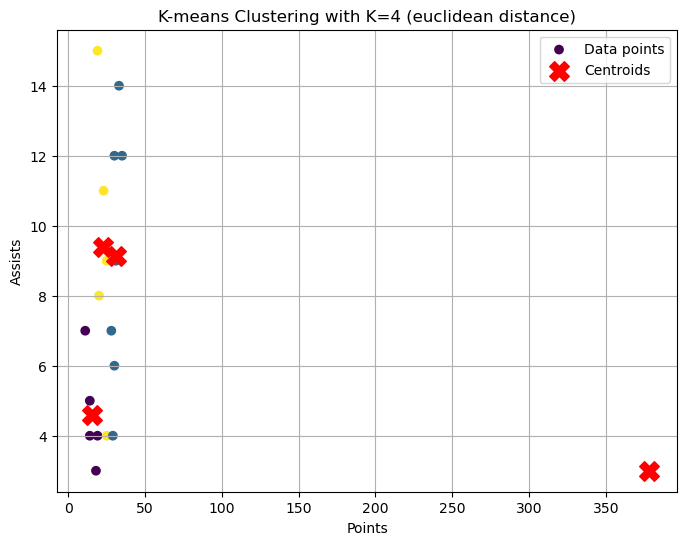

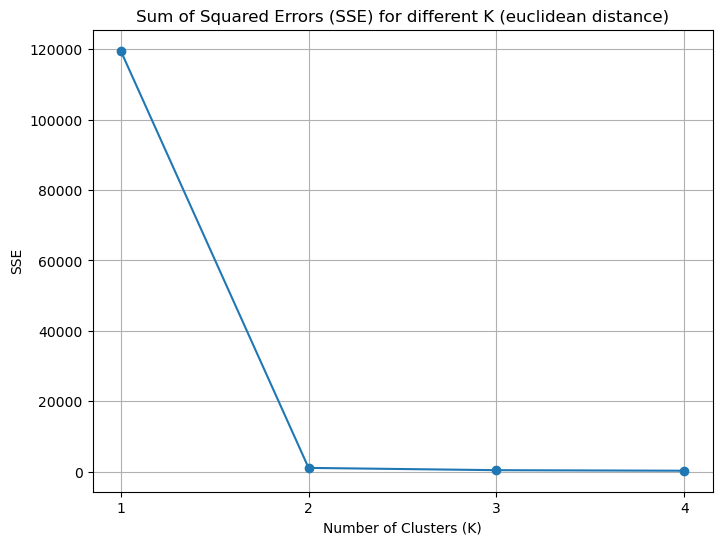

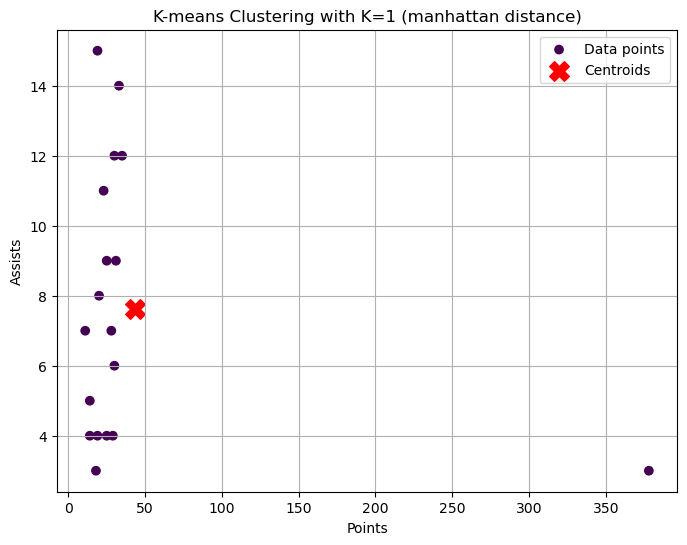

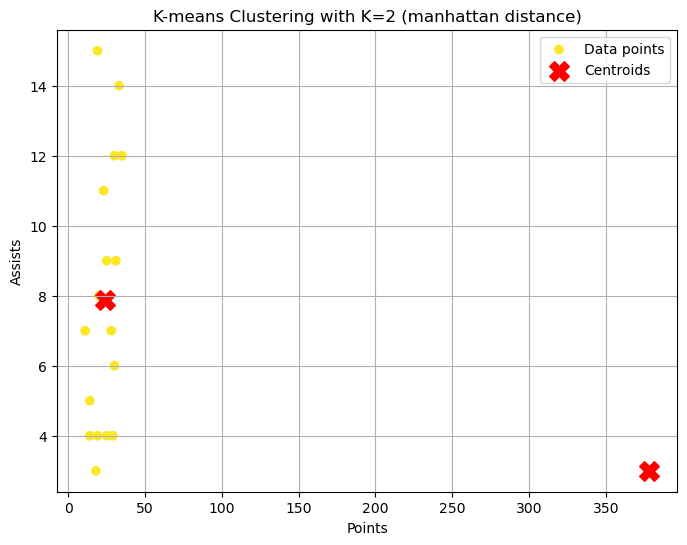

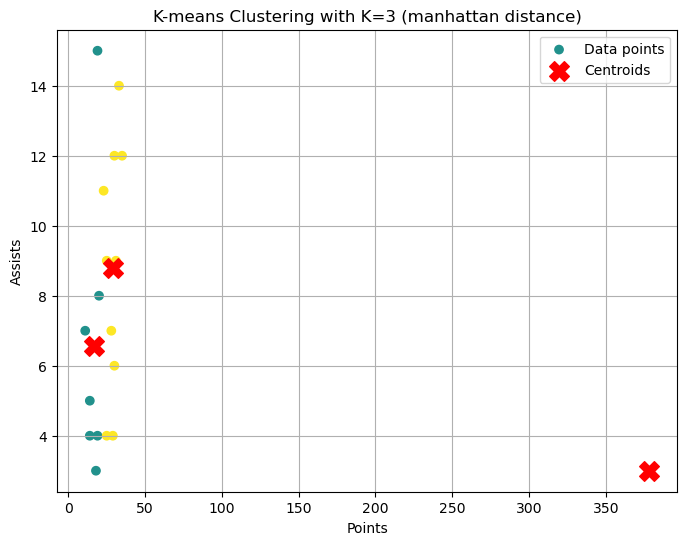

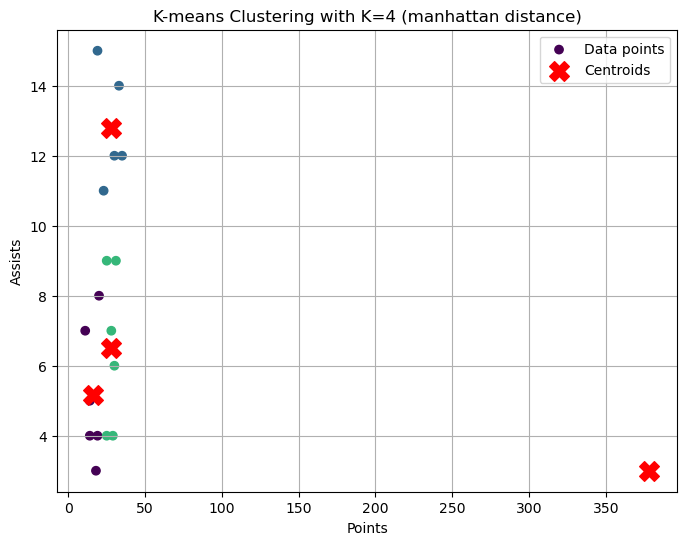

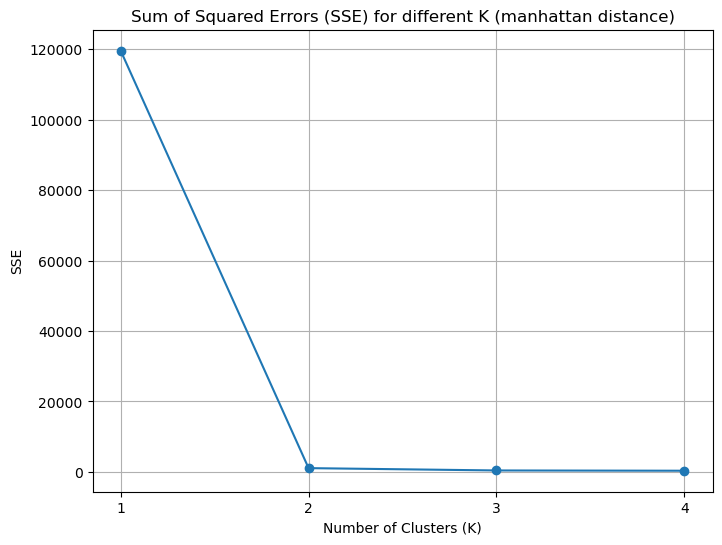

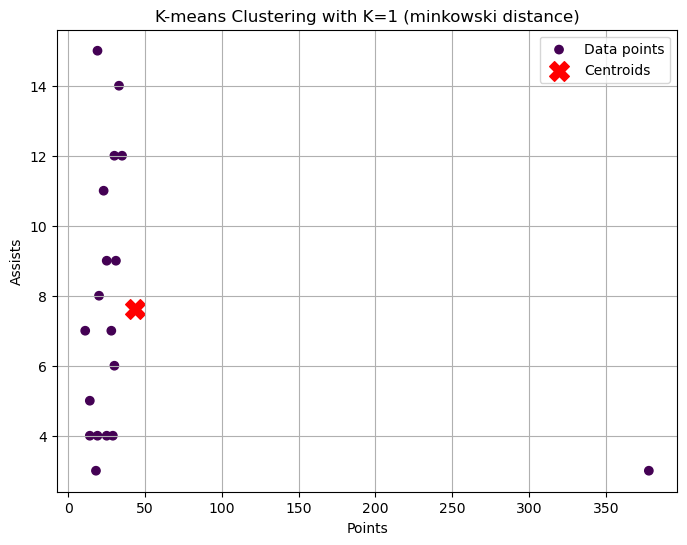

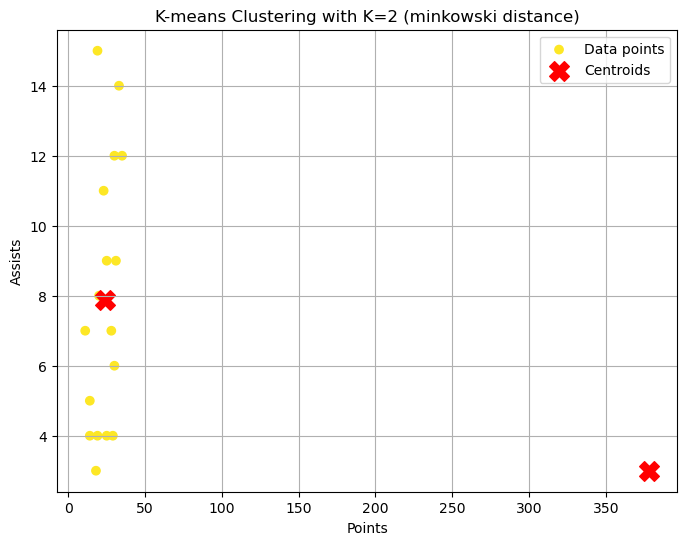

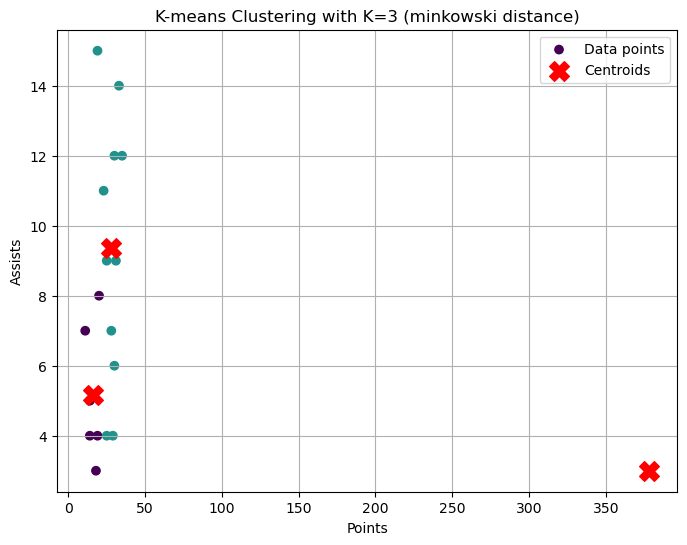

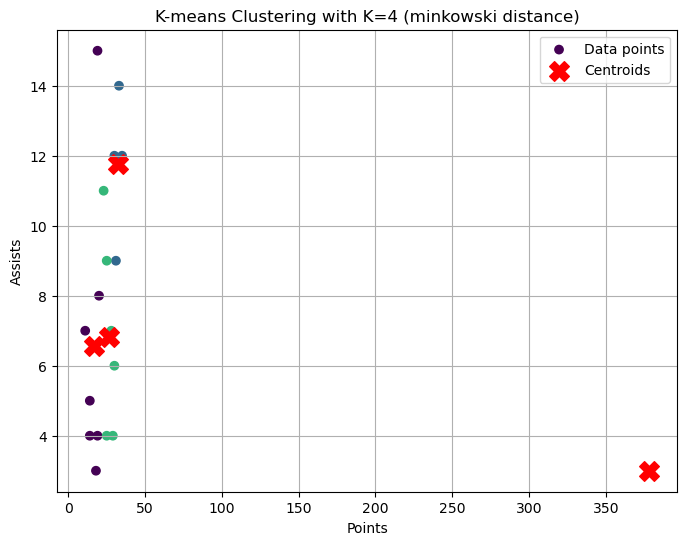

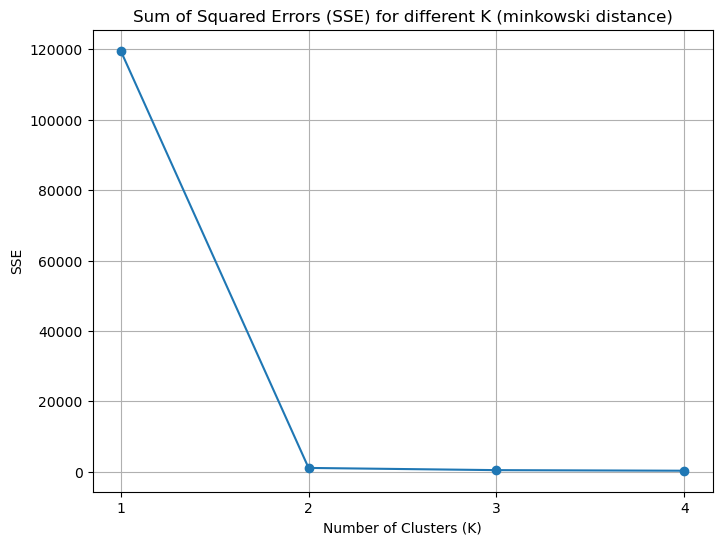

SSE Results:
        euclidean      manhattan      minkowski
1  119602.722222  119602.722222  119602.722222
2    1068.823529    1068.823529    1068.823529
3     418.819444     407.928571     441.378788
4     264.114286     333.133333     275.095238


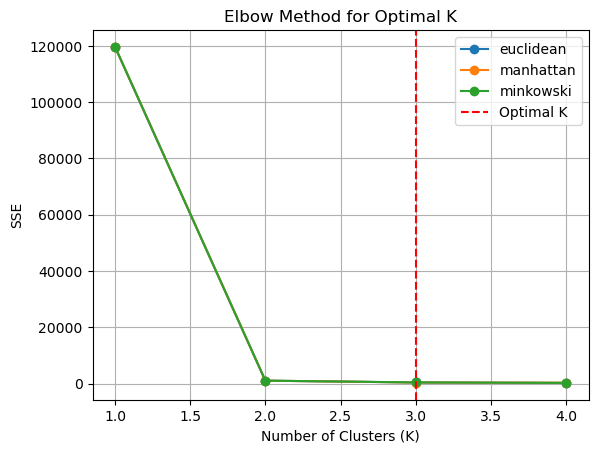

Optimal K values: {'euclidean': 3, 'manhattan': 3, 'minkowski': 3}


In [11]:
def kmeans(data, k, distance_metric='euclidean', max_iters=100):
    centroids = data.sample(k).to_numpy()
    prev_centroids = np.zeros(centroids.shape)

    sse_history = []

    for _ in range(max_iters):
        # Assign clusters
        if distance_metric == 'euclidean':
            distances = np.linalg.norm(data.to_numpy()[:, None] - centroids, axis=2)
        elif distance_metric == 'manhattan':
            distances = np.abs(data.to_numpy()[:, None] - centroids).sum(axis=2)
        elif distance_metric == 'minkowski':
            distances = np.power(np.abs(data.to_numpy()[:, None] - centroids), 3).sum(axis=2) ** (1/3)
        
        clusters = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        sse = np.sum((data.to_numpy() - centroids[clusters])**2)

        sse_history.append(sse)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return clusters, centroids, sse_history

def plot_clusters(data, clusters, centroids, k, distance_metric):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['points'], data['assists'], c=clusters, cmap='viridis', label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering with K={k} ({distance_metric} distance)')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.legend()
    plt.grid()
    plt.show()

def plot_sse(sse_results, distance_metric):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sse_results) + 1), sse_results, marker='o')
    plt.title(f'Sum of Squared Errors (SSE) for different K ({distance_metric} distance)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE')
    plt.xticks(range(1, len(sse_results) + 1))
    plt.grid()
    plt.show()

k_values = [1, 2, 3, 4]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
sse_results = {}

for distance_metric in distance_metrics:
    sse_results[distance_metric] = []
    
    for k in k_values:
        clusters, centroids, sse_history = kmeans(df[['points', 'assists']], k, distance_metric)
        sse_results[distance_metric].append(sse_history[-1])
        plot_clusters(df[['points', 'assists']], clusters, centroids, k, distance_metric)
    
    plot_sse(sse_results[distance_metric], distance_metric)

sse_df = pd.DataFrame(sse_results, index=k_values)
print("SSE Results:\n", sse_df)

optimal_k = {}
for distance_metric in distance_metrics:
    plt.plot(range(1, len(sse_results[distance_metric]) + 1), sse_results[distance_metric], marker='o', label=distance_metric)
    optimal_k[distance_metric] = np.argmin(np.diff(np.diff(sse_results[distance_metric]))) + 2  # Finding the elbow point

plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.axvline(optimal_k[distance_metric], color='red', linestyle='--', label='Optimal K')
plt.legend()
plt.grid()
plt.show()

print("Optimal K values:", optimal_k)